# Statistics and Trends
## Applied Data Science 1
### MSc Data Science (with placement year)
#### University of Hertfordshire
**Author:** Cristina Baron Suarez <br>
**Student ID:** 23069038 <br>
**Email:** [cb24ack@herts.ac.uk](mailto:cb24ack@herts.ac.uk)  <br>
[Github repository](https://github.com/criss-bassu/Clustering_Fitting)

In [3]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.cm as cm

In [4]:
filename = 'walks2.csv'
dfAll = pd.read_csv(filename)
dfAll.head()

,ENMO_mean_wb5,ENMO_sd_wb5,dur_wb5,cad_wb5,v1,v2,v3
0,73.14,57.39,16.50,59.82,0.0,0.889091,0.136333
1,93.59,43.96,15.00,84.60,0.0,1.000000,0.066667
2,99.81,45.35,37.83,79.80,0.0,0.867830,0.091380
3,85.83,30.40,10.08,79.15,0.0,1.000000,0.099206
4,102.48,33.14,11.50,84.87,0.0,1.000000,0.086957


In [5]:
# Standardize all columns
df = (dfAll - dfAll.mean()) / dfAll.std()
df.head()

,ENMO_mean_wb5,ENMO_sd_wb5,dur_wb5,cad_wb5,v1,v2,v3
0,-0.521675,0.283747,-0.420375,-1.440183,-0.144276,-0.383951,0.385959
1,-0.154664,-0.158919,-0.472640,0.116767,-0.144276,0.950254,-0.816991
2,-0.043035,-0.113103,0.322838,-0.184822,-0.144276,-0.639716,-0.390259
3,-0.293931,-0.605870,-0.644071,-0.225662,-0.144276,0.950254,-0.255116
4,0.004883,-0.515557,-0.594593,0.133731,-0.144276,0.950254,-0.466638


Once we have the dataframe, we are now going to study the number of clusters we should use.

In [10]:
# Randomness will play a role in what follows, so we set a random seed for reproducibility
np.random.seed(1) 

We are going to use the silhouette score method in order to determine the best number of clusters. For that, we are going to compares how close data points are within a cluster and the separation between cluster.

In [13]:
def one_silhoutte(n, df):
    """
    Calculates the silhoutte score for n clusters
    """
    # set up the clusterer with the number of expected clusters
    kmeans = KMeans(n_clusters = n, n_init = 20)
    # Fit the data
    kmeans.fit(df)
    labels = kmeans.labels_
    # calculate the silhoutte score
    score = silhouette_score(df, labels)
    return score

In [15]:
best_n, best_score = None, -np.inf
for n in range(2, 11):
    score = one_silhoutte(n, df)
    if score > best_score:
        best_n = n
        best_score = score
    print(f"{n:2g} clusters silhoutte score = {score:0.2f}")
    
print(f"Best number of clusters = {best_n:2g}")

 2 clusters silhoutte score = 0.28
 3 clusters silhoutte score = 0.30
 4 clusters silhoutte score = 0.32
 5 clusters silhoutte score = 0.31
 6 clusters silhoutte score = 0.23
 7 clusters silhoutte score = 0.23
 8 clusters silhoutte score = 0.23
 9 clusters silhoutte score = 0.22
10 clusters silhoutte score = 0.22
Best number of clusters =  4


Apparently, the best number of clusters is 4, according to the silhouette score method. Let's now explore it with the elbow method.

In [17]:
def elbowPlot(df, ini, end):
    inertia = []
    for k in range(ini, end):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(df)
        inertia.append(kmeans.inertia_)
        
    plt.plot(range(ini, end), inertia, 'x-')
    plt.scatter(best_n, inertia[best_n - ini], marker='o', color='red', facecolors='none', s=50)
    plt.xlabel('Number of clusters', fontsize = 14)
    plt.ylabel('Inertia', fontsize = 14)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.show()
    return

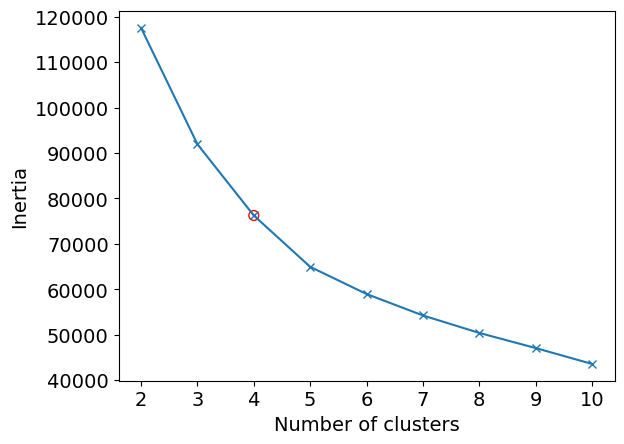

In [18]:
elbowPlot(df, 2, 11)

We will look at the actual data before choosing what should be clustered. For that, we create a pair plot and a heatmap plot.

In [20]:
def pairplot(df):
    sns.pairplot(df, corner=True)
    plt.show()
    return

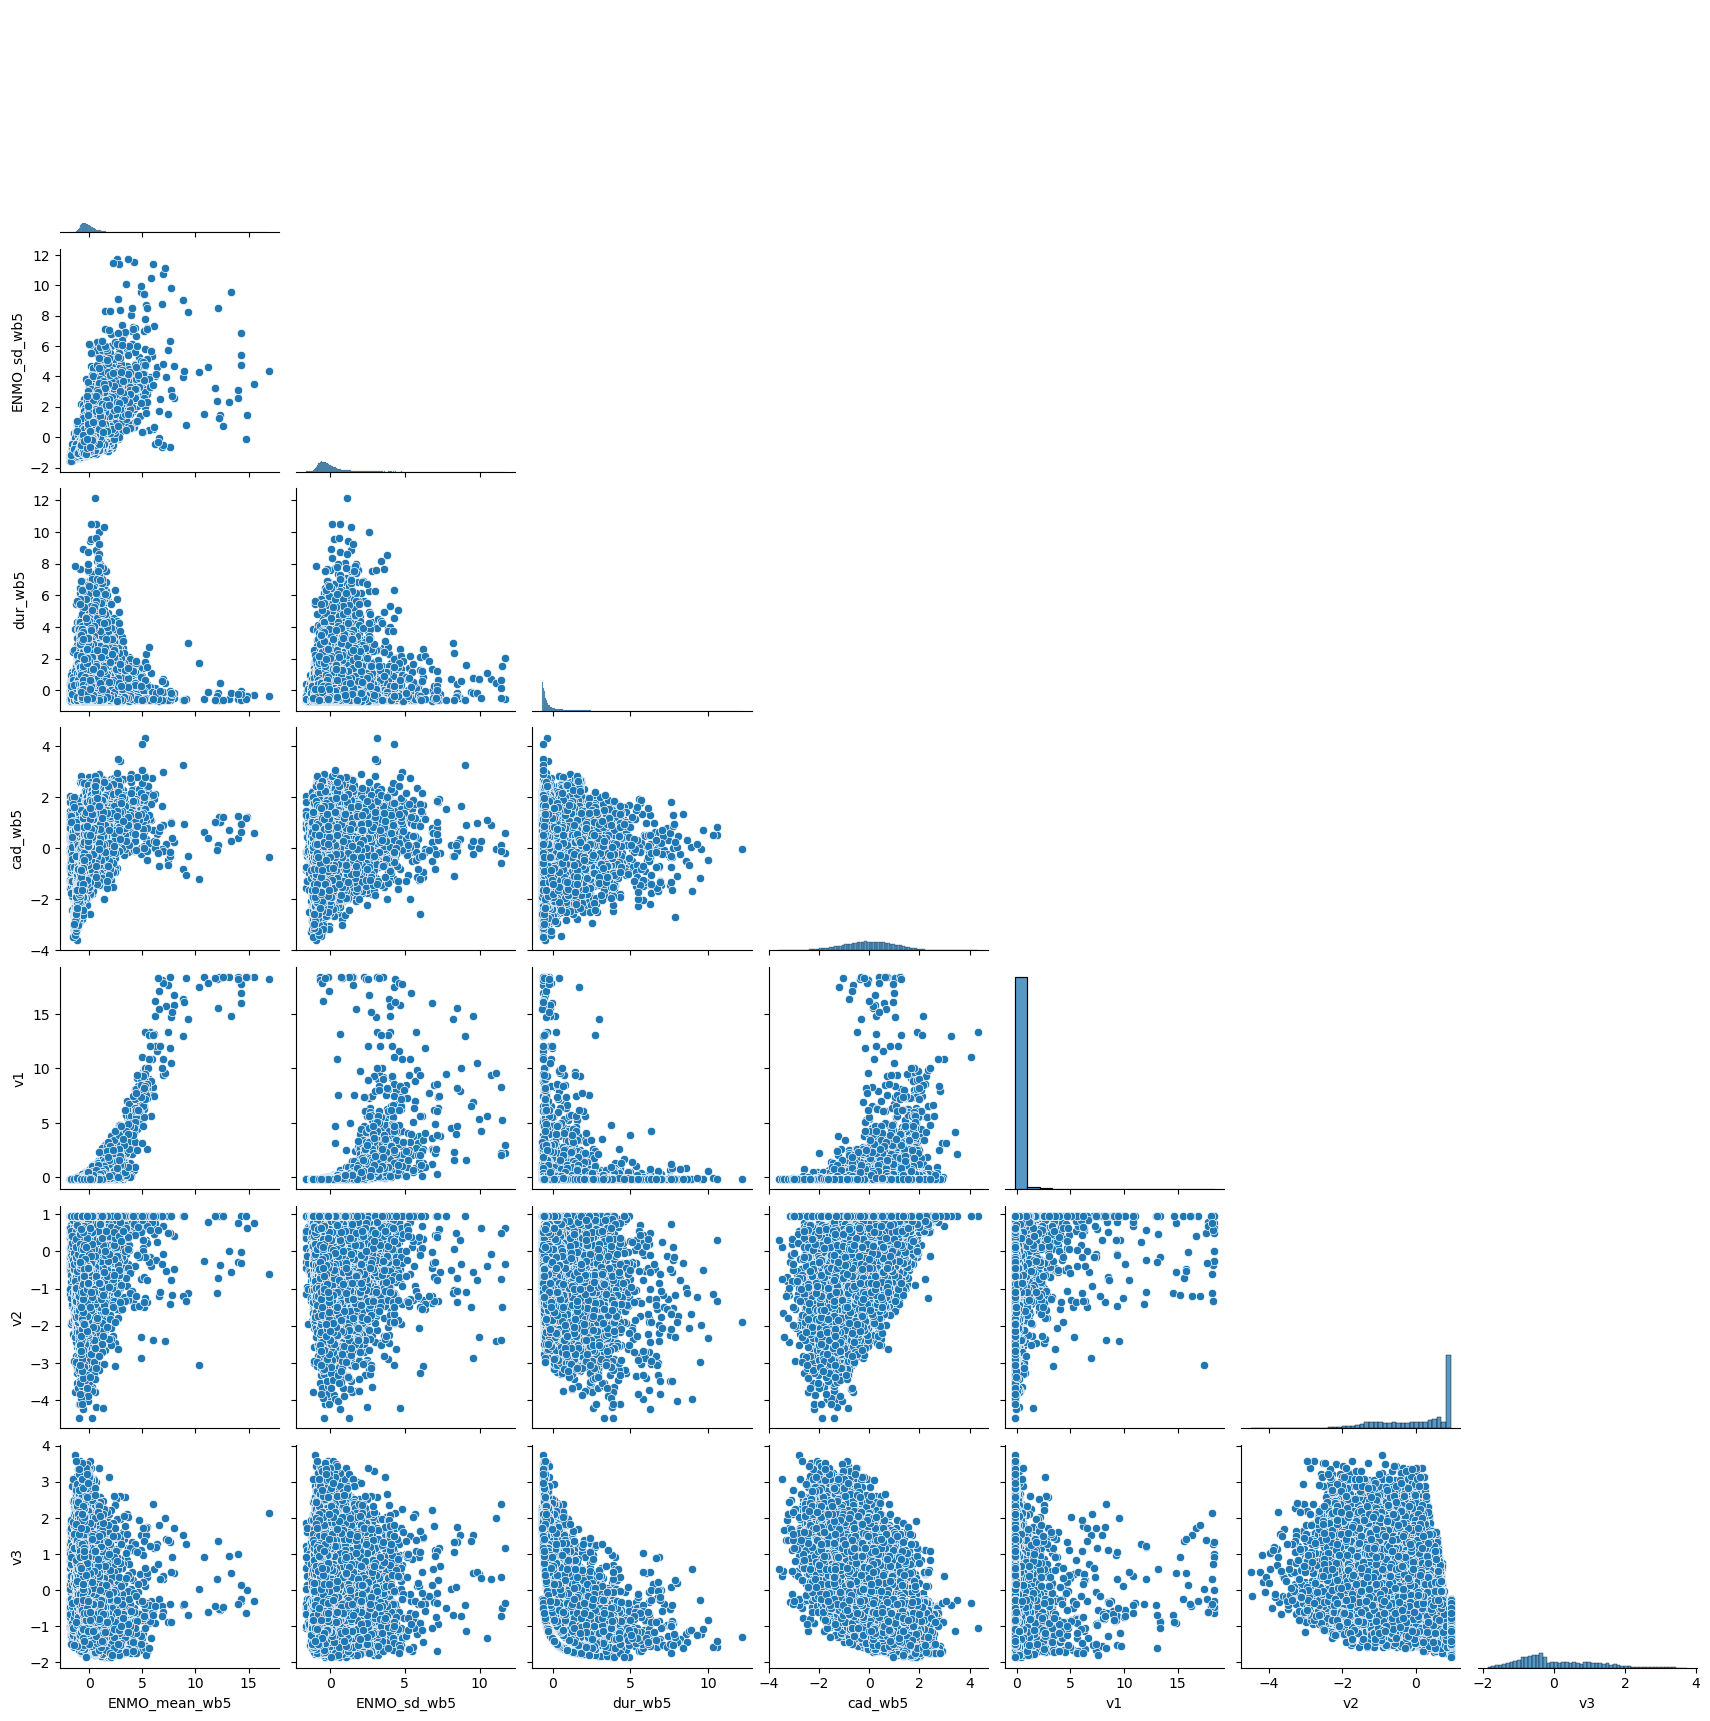

In [21]:
pairplot(df)

In [22]:
def heatmap(df):
    fig, ax = plt.subplots(figsize = (12, 10))
    mask = np.triu(np.ones_like(df.corr()))
    sns.heatmap(df.corr(), ax = ax, vmin = -1, vmax = 1, cmap = 'RdBu', annot = True, mask = mask)
    plt.show()
    return

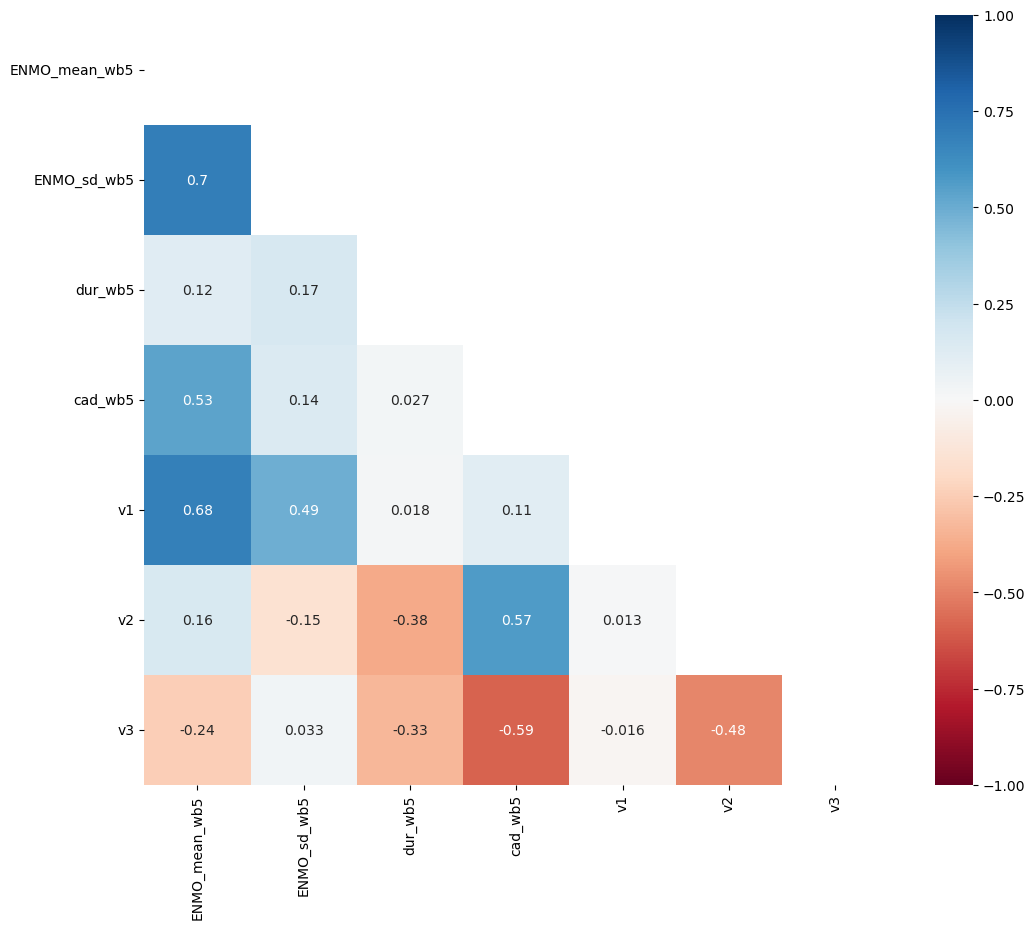

In [23]:
heatmap(df)

We could study at `ENMO_sd_wb5` versus `ENMO_mean_wb5` as these are not too highly correlated.

In [26]:
def plot_histogram(df, cols):
    fig, axes = plt.subplots(nrows = 1, ncols = len(cols), figsize = (12, 6), sharex = True, sharey = True)
    
    for i in range(0, len(cols)):
        axes[i].hist(df[cols[i]], bins = 20, edgecolor = 'black', color = 'skyblue')
        axes[i].set_xlabel(cols[i], fontsize = 14)
        axes[i].set_ylabel('Frequency', fontsize = 14)
        axes[i].tick_params(axis = 'x', labelsize = 14)
        axes[i].tick_params(axis = 'y', labelsize = 14)
        axes[i].grid()
    
    plt.show()
    return

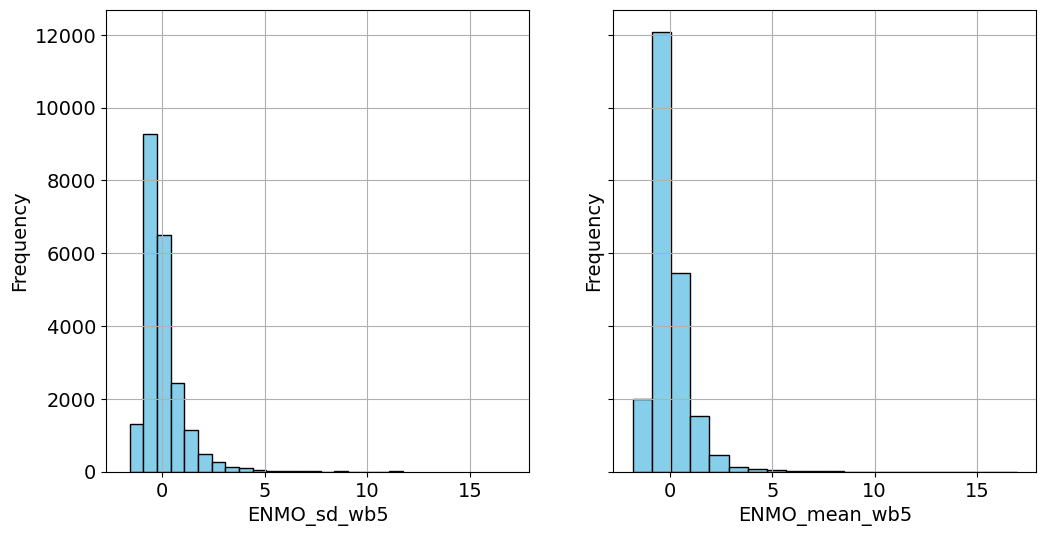

In [27]:
cols = ['ENMO_sd_wb5', 'ENMO_mean_wb5']
xlabels = ['Corrected Kidney Index', 'Peripheral Fat Mass']
plot_histogram(df, cols)

In [30]:
def plot_regresion(df, vars):
    """
    Plots a scatter plot and a linear regression line for the variables we want to study.
    Aim: Observe how different variables correlate with each other.
    Parameters: 
    - df : The DataFrame containing the data
    - vars: A list with the variables to be studied
    - labels: A list with the labels of these variables
    """
    # Creates the figure and the axes
    fig, ax = plt.subplots(dpi = 144, figsize = (6, 4))

    # Generates a scatter plot comparing the first variable against the second variable
    ax.scatter(df[vars[0]], df[vars[1]], marker = 'o', s = 10)

    # Sets a linear regression line (degree 1) to the data
    # Saves the results in the coefficients of the equation of the line
    m, b = np.polyfit(df[vars[0]], df[vars[1]], 1)
    
    # Draws a line in the graph given the axes X and the equation of the line
    ax.plot(df[vars[0]], m * df[vars[0]] + b, color = "red", label = "Regression line")

    ax.grid(True)
    ax.set_xlabel(cols[0], fontsize = 14)
    ax.set_ylabel(cols[1], fontsize = 14)
    ax.tick_params(labelsize = 12)
    ax.legend(fontsize = 12)
    
    plt.show()
    return

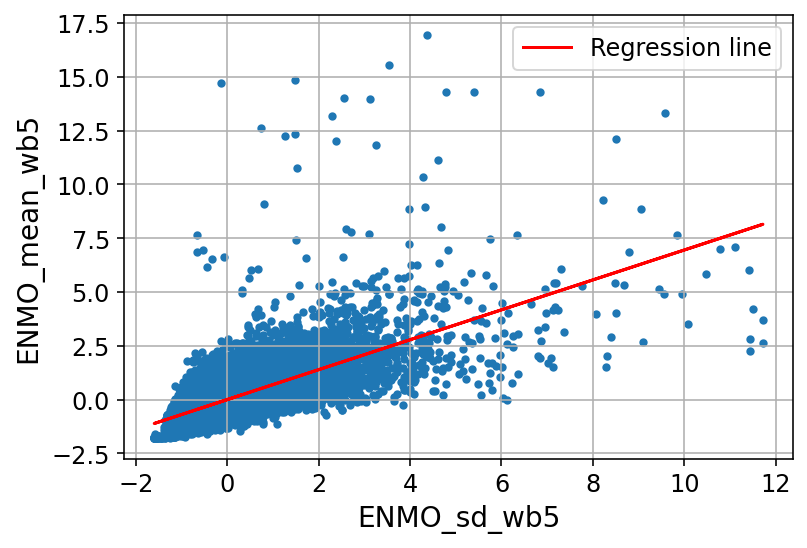

In [31]:
plot_regresion(df, cols)

In [47]:
df_clust = df[cols].copy()
scaler = RobustScaler()
norm = scaler.fit_transform(df_clust)

In [76]:
def plot_fitted(cols, labels, df, xkmeans, ykmeans, centre_labels):
    """
    Plots clustered data as a scatter plot with determined centres shown
    - 'cols' should be a list of two strings that are the column names for the x and y data
    - 'labels' is an array of cluster labels for each data point in df
    - 'df' is a DataFrame containing the data to be plotted
    - 'xkmeans' and 'ykmeans' are arrays of the x and y coordinates of the cluster centers
    - 'centre_labels' is an array of labels for the cluster centers, which should match the cluster labels
    """
    # Generate a color map with unique colors for each cluster label
    colours = plt.cm.Set1(np.linspace(0, 1, len(np.unique(labels))))
    cmap = ListedColormap(colours)

    # Create a scatter plot of the data points
    fig, ax = plt.subplots(dpi=144)
    scatter = ax.scatter(df[cols[0]], df[cols[1]], c=labels, cmap=cmap, marker='o', label='Data')

    # Plot the cluster centers
    ax.scatter(xkmeans, ykmeans, c=centre_labels, cmap=cmap, marker='x', s=100, label='Estimated Centres')

    # Add a color bar and legend
    cbar = fig.colorbar(scatter, ax=ax)
    cbar.set_ticks(np.unique(labels))
    cbar.set_ticklabels(['Cluster {}'.format(int(i)) for i in np.unique(labels)])

    # Set labels and legend
    ax.legend()
    ax.set_xlabel(cols[0])
    ax.set_ylabel(cols[1])
    ax.set_xscale('log')

    plt.show()
    return

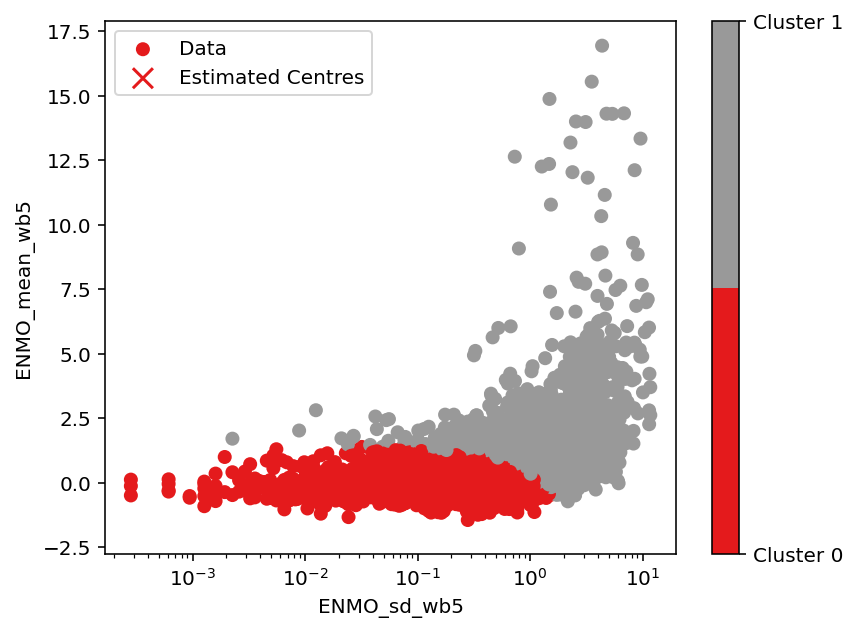

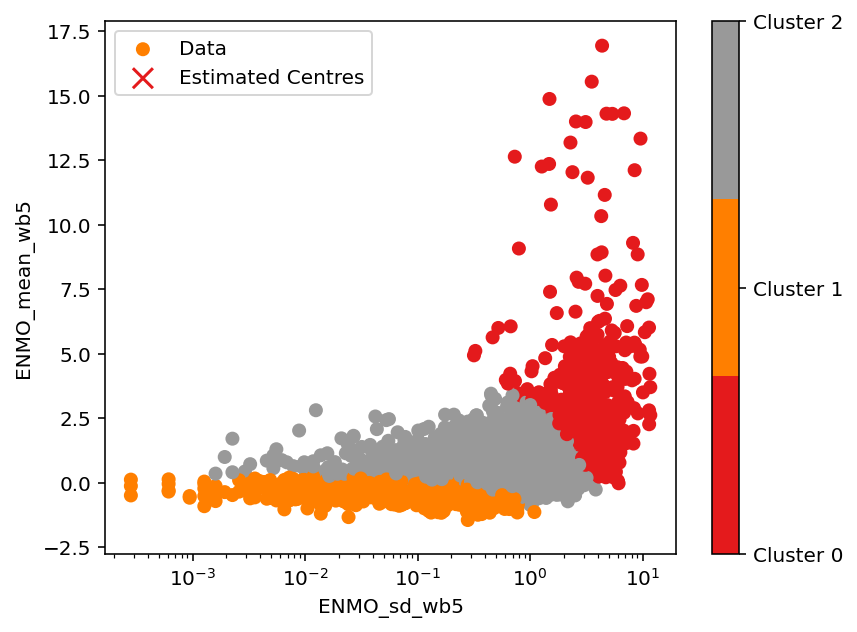

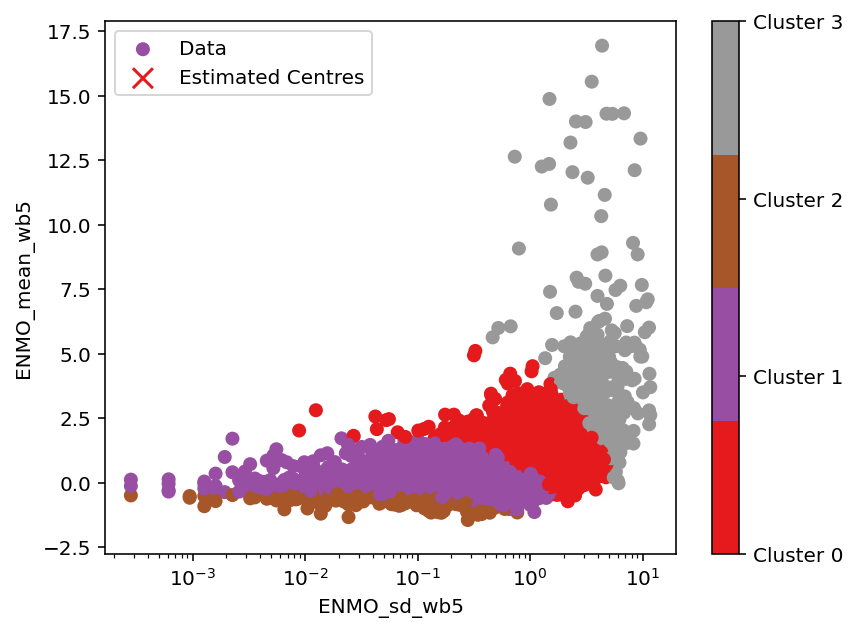

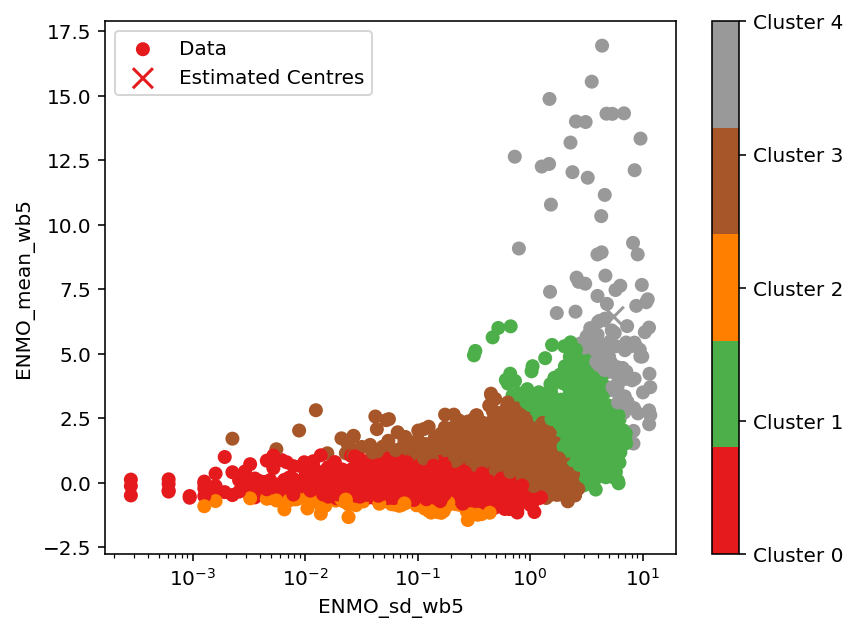

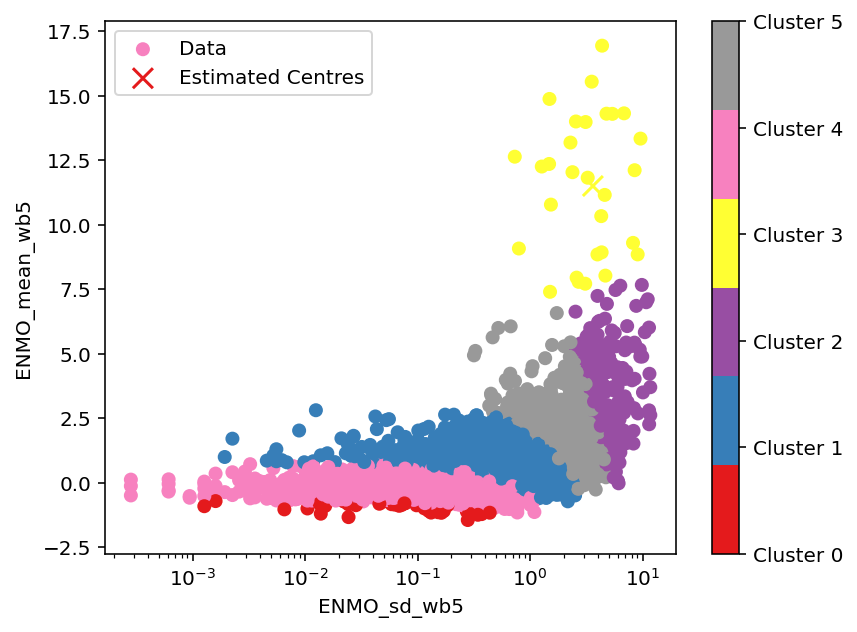

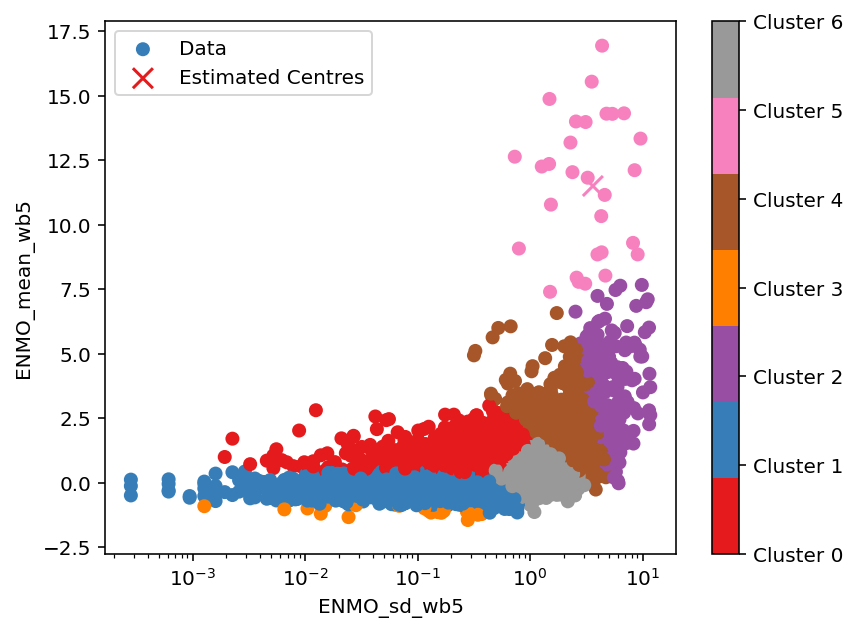

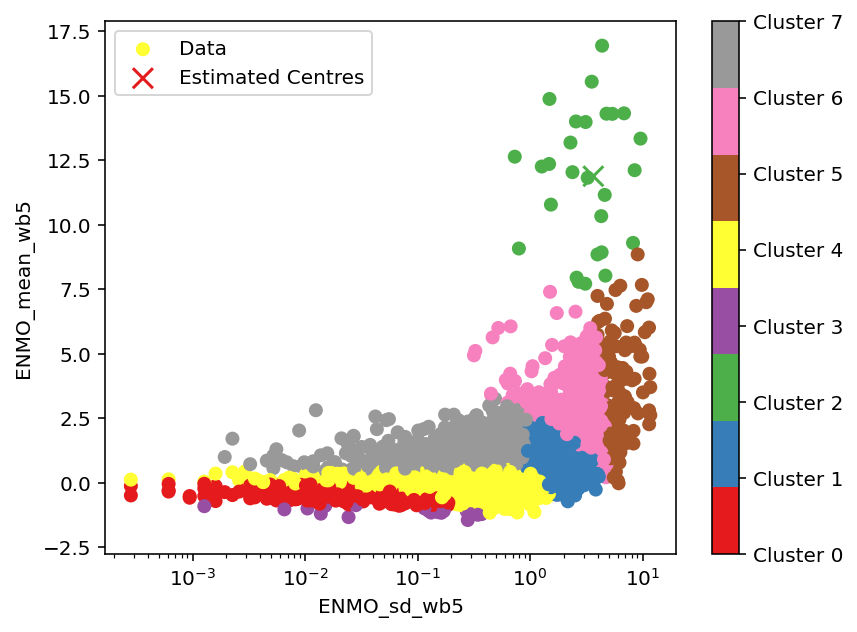

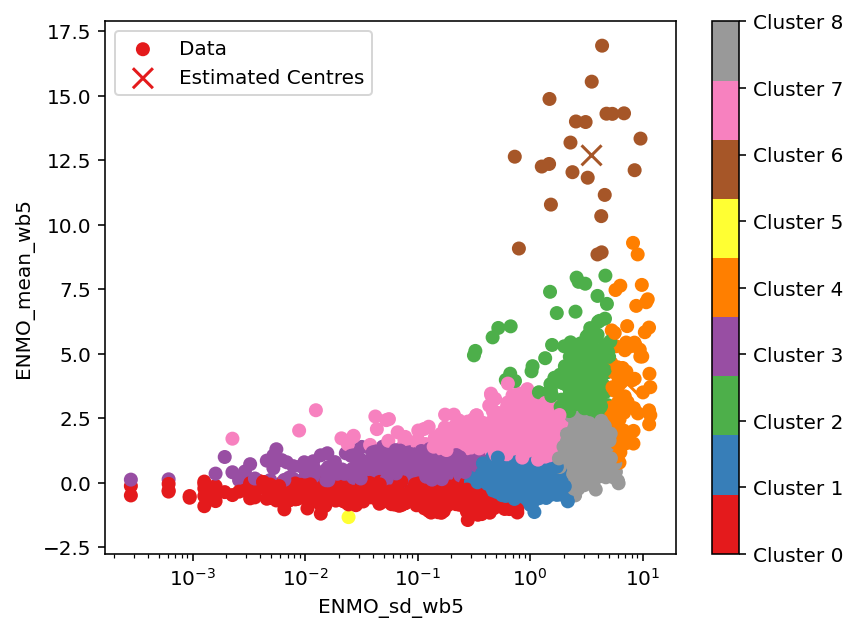

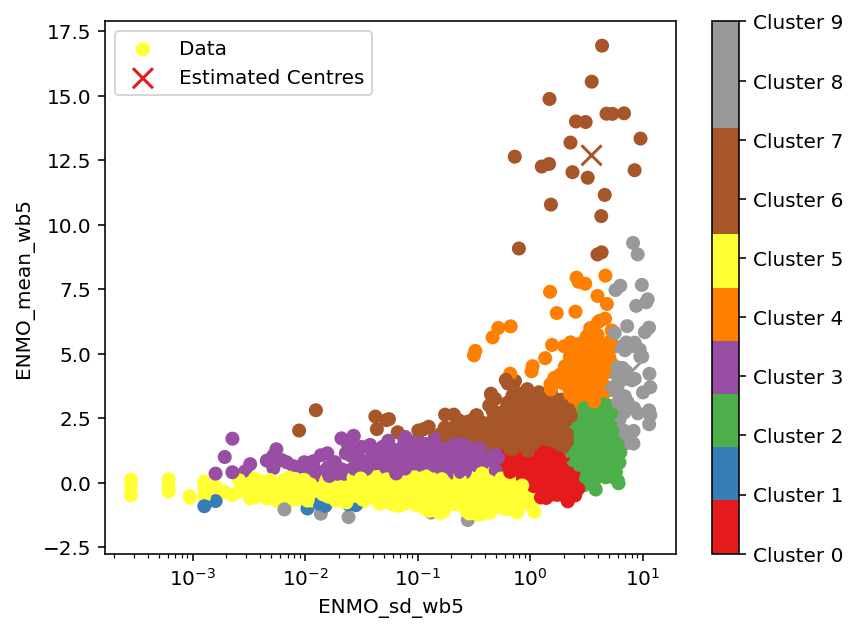

In [82]:
inv_norm = scaler.inverse_transform(norm) # this is important for plotting data accurately
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, n_init = 20)
    kmeans.fit(norm) # fit done on x,y pairs
    labels = kmeans.labels_
    # the estimated cluster centres
    cen = scaler.inverse_transform(kmeans.cluster_centers_)
    xkmeans = cen[:, 0]
    ykmeans = cen[:, 1]
    cenlabels = kmeans.predict(kmeans.cluster_centers_)
    plot_fitted(cols, labels, df, xkmeans, ykmeans, cenlabels)

In [131]:
numClusters = 5
kmeans = KMeans(n_clusters = numClusters)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)
df[f'Cluster{numClusters}'] = y_kmeans
df[f'Cluster{numClusters}'].value_counts()

Cluster5
0    9654
1    7857
2    2303
3    1877
4     149
Name: count, dtype: int64

In [133]:
pca = PCA(n_components = 3)
columns = ['PC1', 'PC2','PC3']
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents, columns = columns)
principalDf[f'Cluster{numClusters}'] = df[f'Cluster{numClusters}']
principalDf.head()

,PC1,PC2,PC3,Cluster5
0,-0.740817,1.148735,0.495277,1
1,-0.428255,-1.414888,0.082082,0
2,-0.344075,0.012574,-0.394012,0
3,-0.960005,-1.104919,0.405818,0
4,-0.599927,-1.375315,0.295020,0


In [135]:
def boxplot(data, columns):
    plt.figure(figsize=(10, 5))
    
    for i in range(0, len(columns)):
        plt.subplot(1, len(columns), i+1)
        sns.boxplot(x = f'Cluster{numClusters}', y = f'PC{i+1}', data = data)

    plt.subplots_adjust(wspace=0.4)
    plt.show()
    return

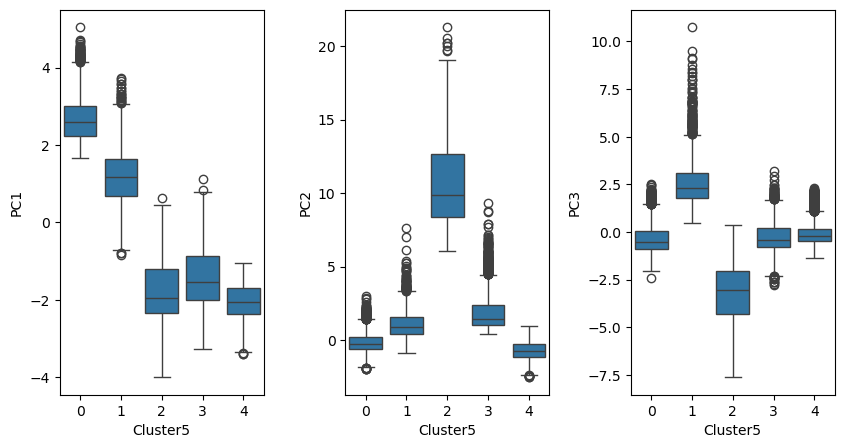

In [128]:
boxplot(principalDf, columns)

After looking at the actual data, we can conclude that is better to choose 5 clusters.